<a href="https://colab.research.google.com/github/donguk99/formation_flight/blob/master/formation_flight_leastsquare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Minimum Energy Control for Formation Flight

---
# objective

$$ Minimize \ \sum_{k=1}^{K} \sum_{t=0}^{N} ||u^{(k)}_t||$$

# subject to

$$\begin{aligned}
  x^{(k)}_{t+1} &= Ax^{(k)}_t + Bu^{(k)}_t
\end{aligned}$$

$$x^{(k)}_{des}=x^{(1)}_{des}+
\begin{bmatrix}
    r_\text{formation}sin\frac{2\pi (k-1)}{(K-1)}\\
    r_\text{formation}cos\frac{2\pi (k-1)}{(K-1)}\\
    -v_\text{formation}sin\frac{2\pi (k-1)}{(K-1)}\\
    -v_\text{formation}cos\frac{2\pi (k-1)}{(K-1)}\\
\end{bmatrix} for\ k=2,3,...,K$$




#Dynamics
---

\begin{aligned}
  x^{(k)}_{t+1} &= Ax^{(k)}_t + Bu^{(k)}_t
\end{aligned}

where the state vector $x^{(k)}_t \in R^4$ consists of two positions ($p^{(k)}_t\in R^2$) and two velocities ($v^{(k)}_t\in R^2$). The vehicle's control $u^{(k)}_t\in R^2$ is acceleration control for the two axes. Then the following matrices describe the above dynamics.

>$$A =
   \begin{bmatrix}
    1 & 0 & \left(1-0.5\gamma\Delta t\right)\Delta t & 0 \\
    0 & 1 & 0 & \left(1-0.5\gamma\Delta t\right)\Delta t \\
    0 & 0 & 1-\gamma\Delta t & 0 \\
    0 & 0 & 0 & 1-\gamma\Delta t
   \end{bmatrix},
B =
  \begin{bmatrix}
    0.5\Delta t^2 & 0 \\
    0 & 0.5\Delta t^2 \\
    \Delta t & 0 \\
    0 & \Delta t
  \end{bmatrix}
$$

**- transform the minimum energy control problem to the standard least norm problem**

$$
\begin{aligned}
  x_1 &= Ax_0 + Bu_0 \\
  x_2 &= Ax_1 + Bu_1 \\
  &= A(Ax_0 + Bu_0) + Bu_1 \\
  &= A^2 x_0 + AB u_0 + Bu_1 \\
  x_3 &= Ax_2 + Bu_2 \\
  &= A(Ax_1 + Bu_1) + Bu_2 \\
  &= A^2x_1 + AB u_1 + Bu_2 \\
  &= A^2(Ax_0+Bu_0) + AB u_1 + Bu_2 \\
  &= A^3x_0 + A^2Bu_0 + ABu_1 + Bu_2  
\end{aligned}
$$

and in general

$$
x_N = A^tx_0 + \underbrace{\begin{bmatrix} A^{N-1}B& A^{N-2}B& ... & AB& B
\end{bmatrix}}_{G} \begin{bmatrix} u_0\\ u_1\\ \vdots \\ u_{N-2}\\ u_{N-1} \end{bmatrix}
$$

$$
Gu = x_N - A^{t}x_0
$$

# Final Condition of Drones

---


- The position of the followers (vehicle $2,\dots,K$) are defined relative to the leader. For example, equispaced circular formation around the leader can be speficied as follows.
$$
  p^{(k)}_N = p^{(1)}_N + r_\text{formation}
  \begin{bmatrix}
    sin\frac{2\pi (k-1)}{(K-1)}\\
    cos\frac{2\pi (k-1)}{(K-1)}
  \end{bmatrix}
$$
$$$$
- The velocity of the followers (vehicle $2,\dots,K$) are also defined relative to the leader. For example, the relative velocities of the followers heading towards the leader can be specified as follows.
$$
  v^{(k)}_N = v^{(1)}_N - v_\text{formation}
  \begin{bmatrix}
    sin\frac{2\pi (k-1)}{(K-1)} \\
    cos\frac{2\pi (k-1)}{(K-1)}
  \end{bmatrix}
$$

# Matrix Form

---



- **final condition**

The difference between followers and leaders can be expressed as $h^{(k)}$

$$h^{(k)} =
  \begin{bmatrix}
    r_\text{formation}sin\frac{2\pi (k-1)}{(K-1)}\\
    r_\text{formation}cos\frac{2\pi (k-1)}{(K-1)}\\
    -v_\text{formation}sin\frac{2\pi (k-1)}{(K-1)}\\
    -v_\text{formation}cos\frac{2\pi (k-1)}{(K-1)}\\
  \end{bmatrix}
  = x^{(k)}_N - x^{(1)}_N
$$

then, can be expressd as

$$H =
  \begin{bmatrix}
    h^{(1)}\\
    h^{(2)}\\
    \vdots\\
    h^{(k)}
  \end{bmatrix}
  =
  \underbrace{\begin{bmatrix}
    \ 0\ \  0\ \cdots\ 0 \\
    -1\ 1\ \cdots\ 0\\
    \vdots\\
    -1\ 0\ \cdots\ 1
  \end{bmatrix}}_C
  \begin{bmatrix}
    x^{(1)}_N\\x^{(2)}_N \\ \vdots\\ x^{(k)}_N
  \end{bmatrix}
  =CX_N
$$

- **Dynamics**

in dynamics $x_N$ can be transform to \\

$$x^{(k)}_N = A^Nx^{(k)}_0+Gu$$

then, substitude dynamics e.q. into final condition matrix

$$H = C
  \begin{bmatrix}
    A^Nx^{(1)}_0+Gu^{(1)}\\
    \vdots\\
    A^Nx^{(K)}_0+Gu^{(K)}
  \end{bmatrix}
  =C
  \begin{bmatrix}
    A^Nx^{(1)}_0\\
    \vdots\\
    A^Nx^{(K)}_0\\
  \end{bmatrix}
  +C
  \begin{bmatrix}
    Gu^{(1)}\\
    \vdots\\
    Gu^{(K)}
  \end{bmatrix}
$$

$$
  C
  \begin{bmatrix}
    Gu^{(1)}\\
    \vdots\\
    Gu^{(K)}
  \end{bmatrix}=H-C
  \begin{bmatrix}
    A^Nx^{(1)}_0\\
    \vdots\\
    A^Nx^{(K)}_0\\
  \end{bmatrix}
$$

Finally, control input(u) can be expressed form of least square problem ($Au=b$)

$$ C G_{diag} u = H-CA^N_{diag}x_0$$ where, $$
G_{diag} =
  \begin{bmatrix}
    G \ 0 \ \cdots \ 0 \\
    0 \ G \ \cdots \ 0 \\
    \vdots \\
    0 \ 0 \ \cdots \ G
  \end{bmatrix}, \ \ \
A^{N}_{diag}=
  \begin{bmatrix}
    A^{N} \ 0 \ \cdots \ 0 \\
    0 \ A^{N} \ \cdots \ 0 \\
    \vdots \\
    0 \ 0 \ \cdots \ A^{N}
  \end{bmatrix}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as ssp
import scipy.sparse.linalg as sla
import cvxpy as cp
import math as m

n = 200 # number of timesteps
T = 20 # time will vary from 0 to T with step delt
ts = np.linspace(0,T,n+1)
delt = T/n
gamma = .05 # damping, 0 is no damping

A = np.zeros((4,4))
B = np.zeros((4,2))
A[0,0] = 1
A[1,1] = 1
A[0,2] = (1-gamma*delt/2)*delt
A[1,3] = (1-gamma*delt/2)*delt
A[2,2] = 1 - gamma*delt
A[3,3] = 1 - gamma*delt

B[0,0] = delt**2/2
B[1,1] = delt**2/2
B[2,0] = delt
B[3,1] = delt

#Initial Position of Drones

In [2]:
K = 6      # 6 drones

np.random.seed(1)

p_0 = np.random.randn(2,K)*2    # initial positions
v_0 = np.random.randn(2,K)      # initial velocities

# Plot initial Condition of Drones

Initial position:
 [[ 3.24869073 -1.22351283 -1.0563435  -2.14593724  1.73081526 -4.60307739]
 [ 3.48962353 -1.5224138   0.63807819 -0.49874075  2.92421587 -4.12028142]]
Initial velocity:
 [[-0.3224172  -0.38405435  1.13376944 -1.09989127 -0.17242821 -0.87785842]
 [ 0.04221375  0.58281521 -1.10061918  1.14472371  0.90159072  0.50249434]]


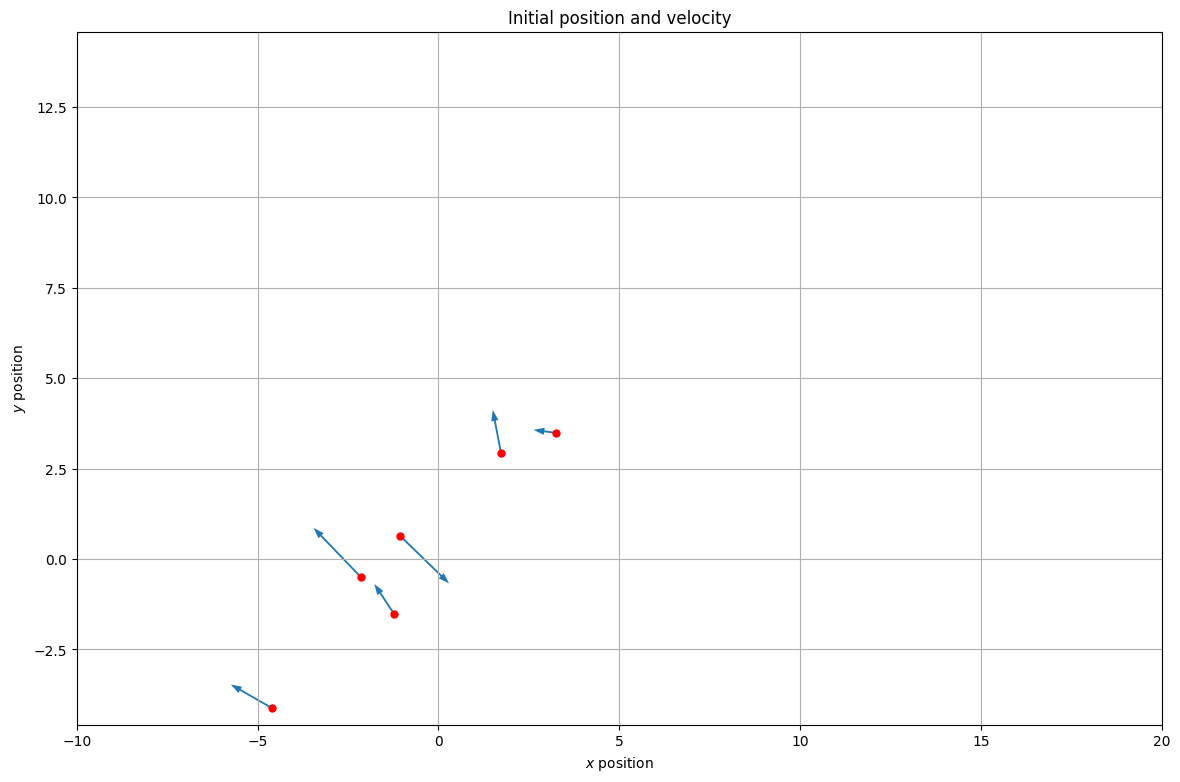

In [3]:
print("Initial position:\n", p_0)
print("Initial velocity:\n", v_0)

plt.figure(figsize=(14,9), dpi=100)
for i in range(K):
  plt.plot(p_0[0,i], p_0[1,i], 'ro', markersize=5)
  plt.arrow(p_0[0,i], p_0[1,i], v_0[0,i], v_0[1,i], head_width=0.2, width=0.05, ec='none')
plt.title('Initial position and velocity')
plt.axis('equal')
plt.xlabel(r'$x$ position')
plt.ylabel(r'$y$ position')
plt.xlim(-10,20)
plt.ylim(-5,15)
plt.grid()
plt.show()

In [4]:
r_formation = 1    # the radius of the formation circle
v_formation = 2    # the speed difference between the leader and the followers

H = np.zeros((4*K, 1))
for k in range(1, K):
  H[4*k:4*k+2, 0] = np.multiply(r_formation, [np.sin((2*np.pi*(k))/(K-1)),np.cos((2*np.pi*(k))/(K-1))])
  H[4*k+2:4*(k+1), 0] = -np.multiply(v_formation, [np.sin((2*np.pi*(k))/(K-1)),np.cos((2*np.pi*(k))/(K-1))])


In [5]:
# A_diag
A_diag = np.zeros((4*K, 4*K))
for k in range(K):
  A_diag[4*k:4*(k+1), 4*k:4*(k+1)] = np.linalg.matrix_power(A,n)

# G_diag
G_diag = np.zeros((4*K, 2*n*K))
G = np.zeros((4,2*n))
for i in range(n):
  G[:, 2*i:2*(i+1)] = np.linalg.matrix_power(A,max(0,n-i-1))@B
for k in range(K):
  G_diag[4*k:4*(k+1), 2*n*k:2*n*(k+1)] = G

# stack x_0 for all k
x_0 = np.zeros((4*K,1))
for k in range(K):
  x_0[4*k:4*k+2,0] = p_0[:,k]
  x_0[4*k+2:4*(k+1),0] = v_0[:,k]

# C
C = np.identity(4*K)
for k in range(K):
  C[4*k:4*(k+1),:4] = C[4*k:4*(k+1),:4] - np.identity(4)

# least square method
u_hat = sla.lsqr(C@G_diag, H-C@A_diag@x_0)[0]

In [6]:
# convert u to x
u_opt = [np.zeros((2*n, 1)) for _ in range(K)]
x = [np.zeros((4, n+1)) for _ in range(K)]
for k in range(K):
  u_opt[k] = u_hat[2*n*k:2*n*(k+1)].reshape(n,2).T
  x[k][:,0] = x_0[4*k:4*(k+1),0]

for k in range(K):
  for t in range(n):
      x[k][:,t+1] = A.dot(x[k][:,t]) + B.dot(u_opt[k][:,t])

# Plot Trajectory

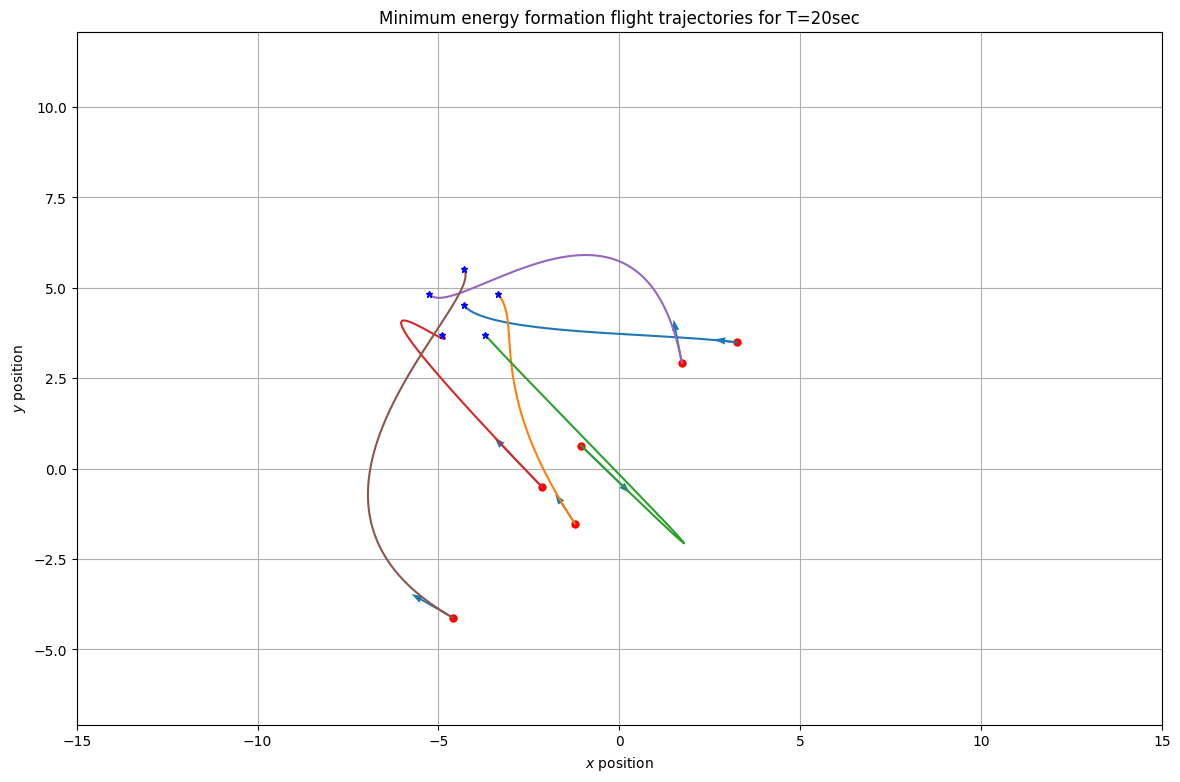

In [7]:
plt.figure(figsize=(14,9), dpi=100)
for k in range(K):
  plt.plot(p_0[0,k], p_0[1,k], 'ro', markersize=5)
  plt.arrow(p_0[0,k], p_0[1,k], v_0[0,k], v_0[1,k], head_width=0.2, width=0.05, ec='none')
  plt.plot(x[k][0,:], x[k][1,:])
  plt.plot(x[k][0,-1], x[k][1,-1], 'b*', markersize=5)
plt.title('Minimum energy formation flight trajectories for T=20sec')
plt.axis('equal')
plt.xlabel(r'$x$ position')
plt.ylabel(r'$y$ position')
plt.xlim(-15,15)
plt.ylim(-10,15)
plt.grid()
plt.show()

# Plot norm of Control input **u**

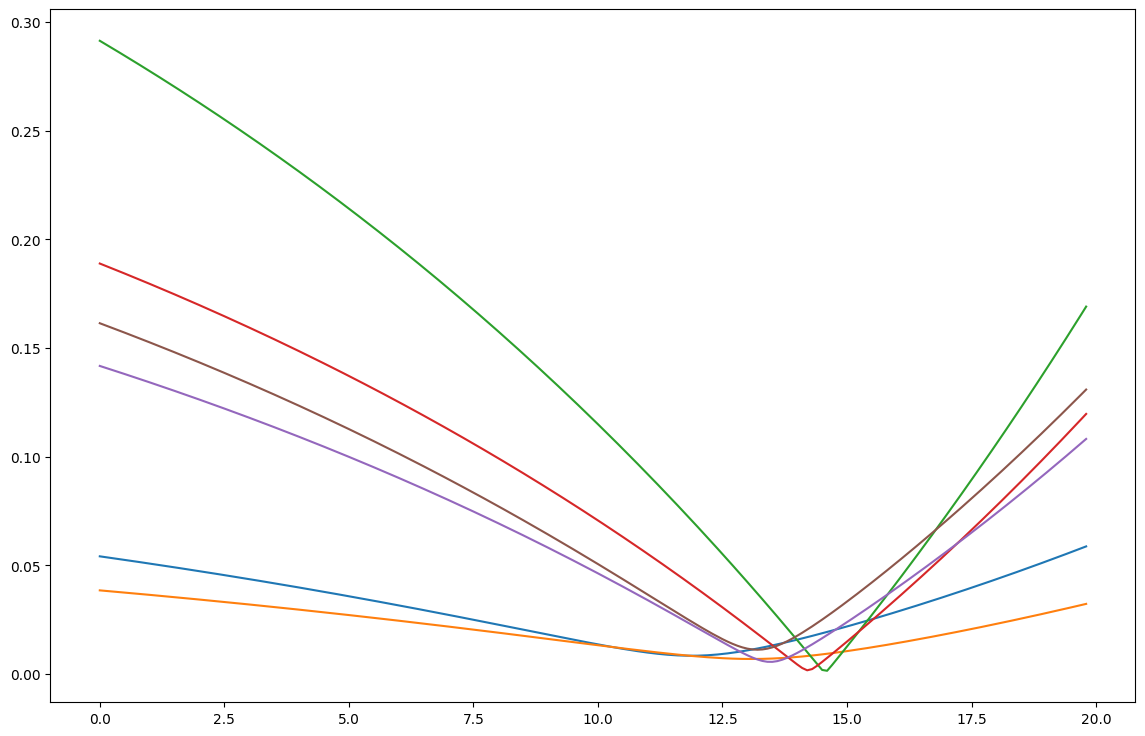

In [8]:
plt.figure(figsize=(14,9), dpi=100)

u_norm = np.zeros((n-1,K))
for k in range(K):
  for i in range(n-1):
    u_norm[i][k] = np.linalg.norm(u_opt[k][:,i])
for k in range(K):
  plt.plot(ts[:-2], u_norm[:,k])